In [7]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
import re

In [13]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [14]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [15]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [25]:
#from google.colab import files
#uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'WhatsApp Chat with B.Tech CSE  6th Section A.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [32]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
5535,2021-02-06,13:27,Bavneet,So is it okay to think that we will get atleas...
5536,2021-02-06,13:28,Avni,Sir can you please give us a bit of estimate a...
5537,2021-02-06,13:49,Hod Sir,That we will decide don't worry
5538,2021-02-06,13:55,Dhruv,Sir Could you please tell us the mode of the e...
5539,2021-02-06,13:57,Hod Sir,It's entire university examination so as such ...
5540,2021-02-06,14:00,Dhruv,So should we consider offline mode as the fina...
5541,2021-02-06,14:00,Hod Sir,Not final but I m giving u hint
5542,2021-02-06,14:02,Dhruv,Thanks for the lead sir But we are still swing...
5543,2021-02-06,14:02,Hod Sir,It's offline subjective that most of the unive...
5544,2021-02-06,14:06,+91 70096 83090,It’s because teachers in Gndu affilated colleg...


In [27]:
df.Author.unique()

array([None, 'CR', '+91 97806 12025', '+91 98787 43991',
       '+91 98720 49066', '+91 95010 33889', 'SAD', 'Hod Sir',
       '+91 99880 94731', '+91 82848 36950', '+91 95696 88722', 'Dhruv',
       '+91 98782 60488', '+91 96535 74694', 'Devanshi',
       '+91 79736 48871', 'Lovee', '+91 75289 17733', '+91 78883 71247',
       '+91 73408 34459', '+91 95924 88227', 'abhishek Padhwal',
       '+91 6239 451 533', '+91 73408 16631', '+91 98148 39646',
       '+91 70096 83090', '+91 79869 53124', 'Krishan', '+91 89680 34924',
       '+91 94177 60204', '+91 6280 090 175', '+91 98823 57571',
       '+91 81462 41663', 'Avni', '+91 90411 11587', '+91 96467 40177',
       '+91 99978 14072', '+91 76965 36952', '+91 94645 41057',
       '+91 89019 04401', '+91 73557 75696', '+91 70095 62235',
       '+91 86288 80717', '+91 94655 81514', 'Ashutosh',
       '+91 98769 31287', '+91 79019 26491', 'Bavneet', '+91 98156 55768',
       '+91 95920 70455', '+91 77289 07716', '+91 75897 94003',
       '+91

In [33]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

1317


0       []
1       []
2       []
3       []
4       []
        ..
5550    []
5551    []
5552    []
5553    []
5554    []
Name: Message, Length: 5555, dtype: object

In [45]:

URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Official Btech CSE 6th Sem Group")
print("Messages:",df.shape[0])
print("Media:",media_messages)
#print("Emojis:",emojis)
print("Links:",links)

Official Btech CSE 6th Sem Group
Messages: 5555
Media: 1317
Links: 581


In [63]:
ser=df.groupby('Author').agg({'Message':'count'})
print("Top 5 Senders with max message count\n",ser.sort_values('Message' , ascending=False).head())

Top 5 Senders with max message count
                  Message
Author                  
CR                  2594
+91 97806 12025     1299
Hod Sir              124
SAD                  103
+91 82848 36950       90


In [68]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["CR", "+91 97806 12025", "Hod Sir" ,"SAD" , "+91 82848 36950"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent : ', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message : ', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent : ', media)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent : ', links)   
  print()

Stats of CR -
Messages Sent :  1768
Words per message :  19.727941176470587
Media Messages Sent :  826
Links Sent :  61

Stats of +91 97806 12025 -
Messages Sent :  956
Words per message :  20.972803347280333
Media Messages Sent :  343
Links Sent :  67

Stats of Hod Sir -
Messages Sent :  83
Words per message :  27.59036144578313
Media Messages Sent :  41
Links Sent :  9

Stats of SAD -
Messages Sent :  82
Words per message :  14.121951219512194
Media Messages Sent :  21
Links Sent :  43

Stats of +91 82848 36950 -
Messages Sent :  82
Words per message :  17.329268292682926
Media Messages Sent :  8
Links Sent :  1



There are 451860 words in all the messages.


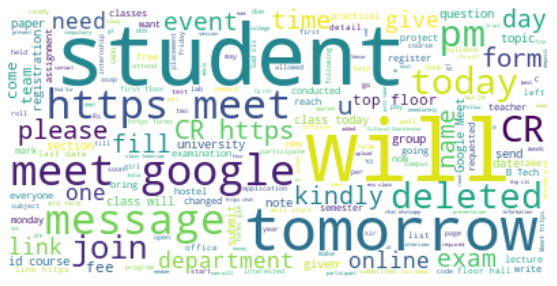

In [70]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name CR


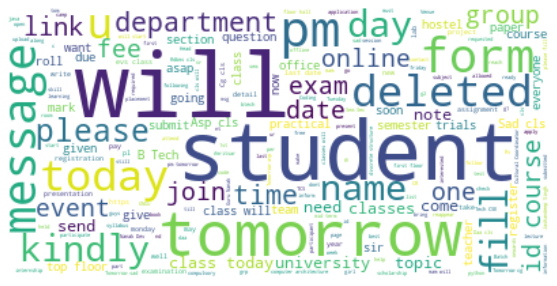

Author name +91 97806 12025


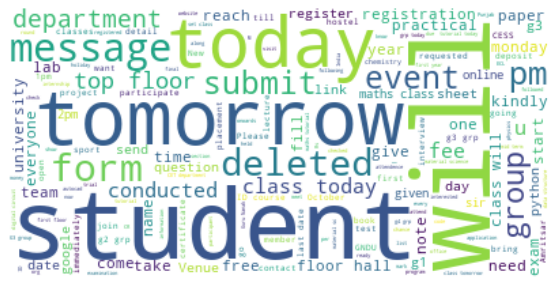

Author name Hod Sir


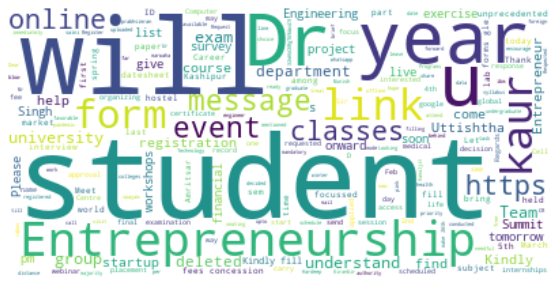

Author name SAD


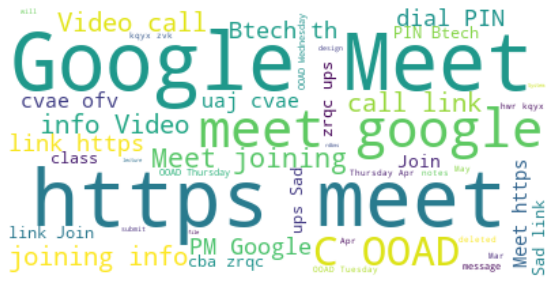

Author name +91 82848 36950


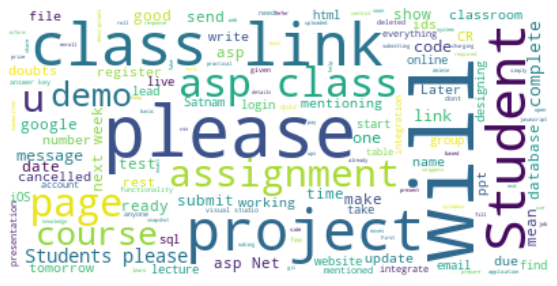

In [71]:
l = ["CR", "+91 97806 12025", "Hod Sir" ,"SAD" , "+91 82848 36950"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()